# Example of using the `Streetscape` class

In [1]:
import geopandas as gpd
import momepy
import numpy as np
import rioxarray

/Users/martin/dev/pysal/.pixi/envs/default/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Read all the data. Only streets and buildings are required.

In [2]:
streets = gpd.read_file(
    momepy.datasets.get_path("bubenec"), layer="streets"
).to_crs(5514)
buildings = gpd.read_file(
    momepy.datasets.get_path("bubenec"), layer="buildings"
).to_crs(5514)
plots = gpd.read_file(
    momepy.datasets.get_path("bubenec"), layer="plots"
).to_crs(5514)
dtm = rioxarray.open_rasterio(momepy.datasets.get_path("bubenec"), layer="dtm")

Mimic data on building category and height.

In [3]:
buildings["category"] = np.random.randint(0, 6, len(buildings))
buildings["height"] = np.random.randint(12, 30, len(buildings))

Initiate the class. This will dricectly compute builk of the sightline indicators based on streets and buildings.

In [ ]:
sc = momepy.Streetscape(
    streets, buildings, category_col="category", height_col="height"
)

If you have plots and DTM, you can use two additional methods to compute additional variables.

In [ ]:
sc.compute_plots(plots)
sc.compute_slope(dtm)

The resulting data can be extracted either on a street level:

In [6]:
street_df = sc.street_level()
street_df.head()

,N,n_l,n_r,left_os,right_os,os,left_os_std,right_os_std,os_std,left_os_mad,...,left_plot_WD_ratio,right_plot_WD_ratio,plot_WP_ratio,left_plot_WP_ratio,right_plot_WP_ratio,slope_degree,slope_percent,n_slopes,slope_valid,geometry
street_index,,,,,,,,,,,,,,,,,,,,,
0,57,28,38,33.607135,38.163914,71.771049,14.794107,12.059253,13.436283,13.873261,...,1.156827,1.765917,0.170662,0.156054,0.184501,2.809318,0.049073,57,True,"LINESTRING (-743681.992 -1040957.169, -743809...."
1,22,0,19,50.000000,17.497487,67.497487,0.000000,14.015687,9.794670,0.000000,...,1.440014,1.037320,0.255912,0.284263,0.230261,0.166605,0.002908,22,True,"LINESTRING (-743916.081 -1041162.952, -743899...."
2,43,36,21,13.907200,35.792031,49.699231,16.207022,15.188099,15.613165,11.913767,...,0.822465,1.635065,0.200568,0.221176,0.181546,1.122029,0.019587,43,True,"LINESTRING (-743689.806 -1041115.822, -743698...."
3,24,0,0,50.000000,48.865531,98.865531,0.000000,4.101247,2.869002,0.000000,...,1.444666,1.307638,0.156703,0.060853,0.248559,2.735747,0.047794,24,True,"LINESTRING (-743618.342 -1040934.607, -743621...."
4,15,0,0,50.000000,50.000000,100.000000,0.000000,0.000000,0.000000,0.000000,...,1.023257,0.842462,0.068937,0.050164,0.058499,1.505840,0.026294,15,True,"LINESTRING (-743701.515 -1040870.813, -743693...."


It is a GeoDataFrame, so you can directly plot it.

<Axes: >

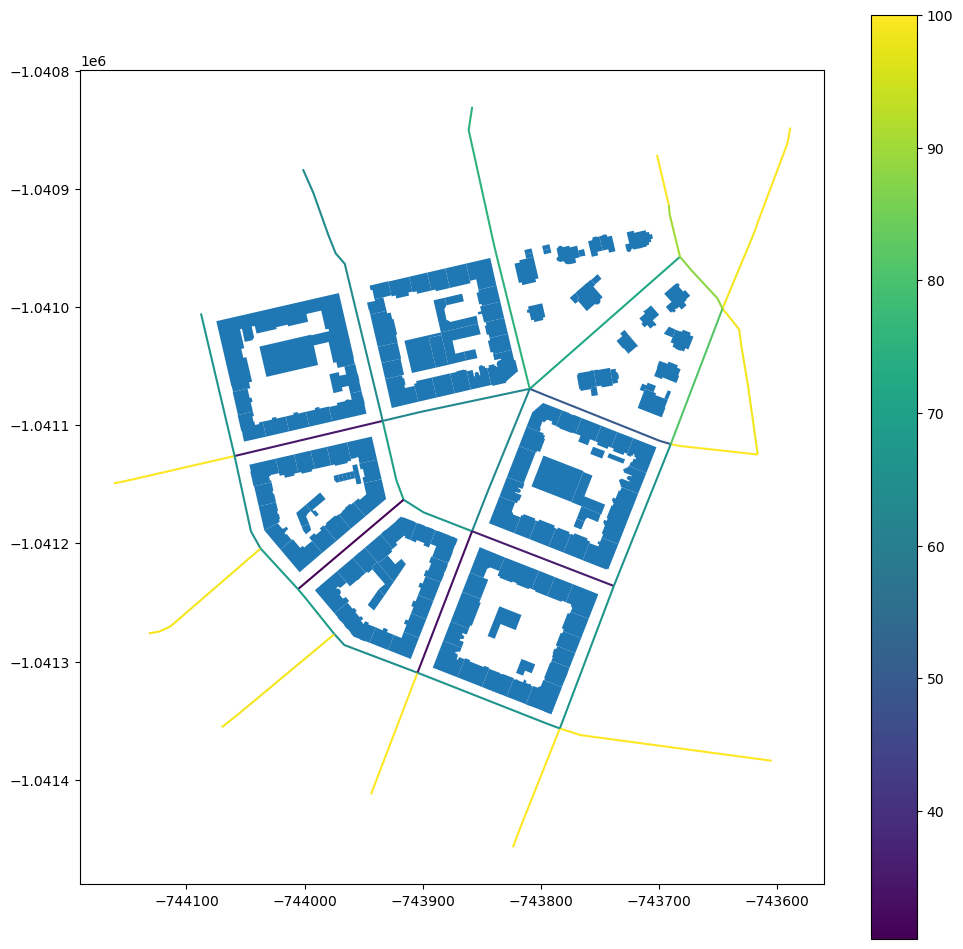

In [7]:
ax = street_df.plot("os", figsize=(12, 12), legend=True)
buildings.plot(ax=ax)

Or for all individual sightline points.

In [8]:
point_df = sc.point_level()
point_df.head(10)

,geometry,left_os_count,left_os,left_sb_count,left_sb,left_h,left_hw,left_bc,right_os_count,right_os,...,right_plot_seq_sb_depth,os_count,os,sb_count,sb,h,hw,bc,plot_seq_sb,plot_seq_sb_depth
street_index,,,,,,,,,,,,,,,,,,,,,
0,POINT (-743682.367 -1040957.5),1,50.000000,0,NaN,NaN,NaN,0.000000,1,50.000000,...,19.240118,2,50.000000,0,NaN,NaN,NaN,0.000000,14.568200,19.240118
0,POINT (-743684.627 -1040959.485),1,50.000000,0,NaN,NaN,NaN,0.000000,1,50.000000,...,18.011884,2,50.000000,0,NaN,NaN,NaN,0.000000,10.090066,18.011884
0,POINT (-743686.886 -1040961.471),1,50.000000,0,NaN,NaN,NaN,0.000000,1,27.593446,...,15.658901,2,38.796723,1,27.593446,24.0,0.869772,2.491801,10.100149,15.658901
0,POINT (-743689.145 -1040963.457),1,50.000000,0,NaN,NaN,NaN,0.000000,1,26.229691,...,14.184017,2,38.114846,1,26.229691,24.0,0.914994,5.604209,9.996735,27.216748
0,POINT (-743691.405 -1040965.443),1,50.000000,0,NaN,NaN,NaN,0.000000,1,25.412462,...,23.317758,2,37.706231,1,25.412462,24.0,0.944419,6.825341,9.996961,32.570991
0,POINT (-743693.664 -1040967.428),1,23.978541,0,NaN,NaN,NaN,6.557431,1,25.198986,...,21.500873,2,24.588764,1,25.198986,24.0,0.952419,11.811294,9.997186,29.171224
0,POINT (-743695.923 -1040969.414),1,14.720375,0,NaN,NaN,NaN,15.763951,1,26.764536,...,20.928554,2,20.742455,1,26.764536,24.0,0.896709,16.722367,9.997412,25.070210
0,POINT (-743698.182 -1040971.4),1,14.705134,0,NaN,NaN,NaN,16.541363,1,28.184169,...,18.024346,2,21.444652,1,28.184169,24.0,0.851542,15.669026,9.997637,21.235336
0,POINT (-743700.442 -1040973.386),1,14.689893,0,NaN,NaN,NaN,19.812513,1,29.961410,...,19.832787,2,22.325652,1,29.961410,24.0,0.801030,13.593521,9.997863,24.073478


Again, it is a GeoDataFrame, this time with point geometry.

<Axes: >

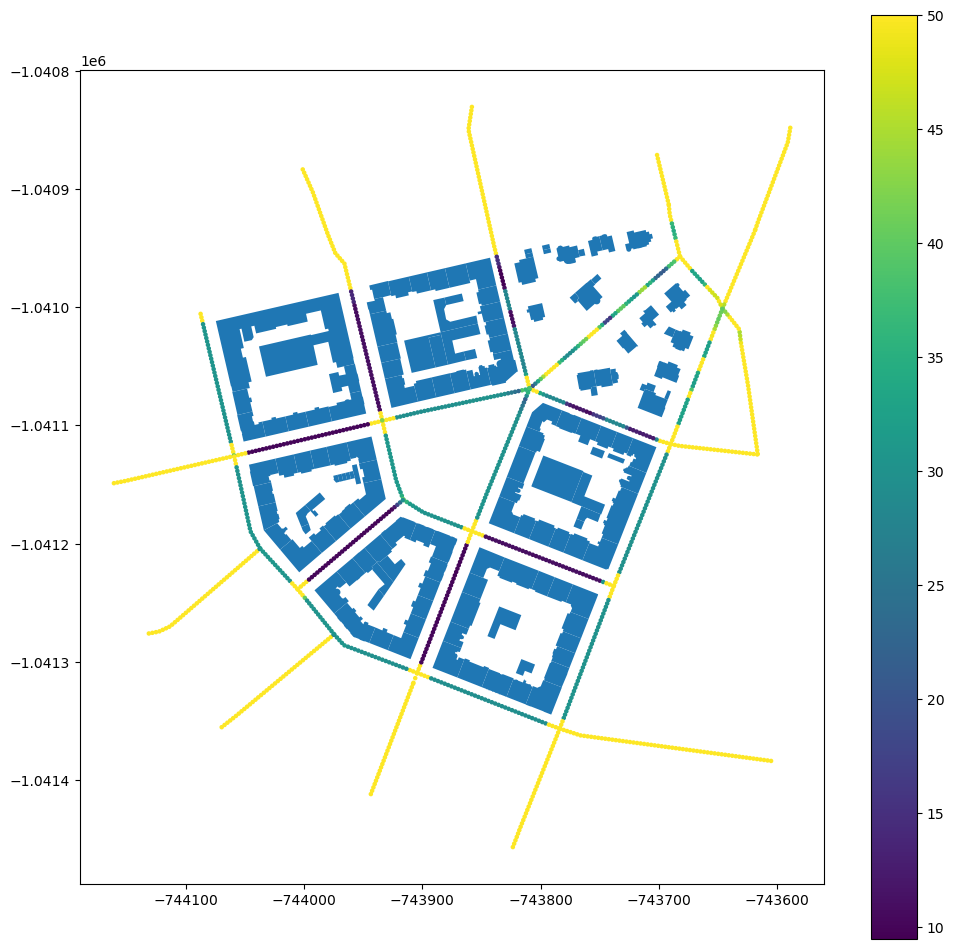

In [9]:
ax = point_df.plot("os", figsize=(12, 12), legend=True, markersize=5)
buildings.plot(ax=ax)